# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [116]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

In [118]:
data = pd.read_csv('./train.csv')

In [119]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Рассмотрим случайную выборку из 3% данных в train

In [120]:
data_show_rand = data.sample(frac=0.03)
data_show_rand 

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1099,19,56.10,1033.9,Female,0,No,No,Yes,Yes,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,0
4567,11,74.95,815.5,Male,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,1
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
1663,71,104.15,7365.3,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
3643,56,109.60,5953,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,22,50.60,1073.3,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
3530,1,45.60,45.6,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
3968,72,82.65,5919.35,Female,0,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [121]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Создадим новый датасет копией train просто на всякий случай

In [122]:
N_data = data

Конвертируем численную переменную TotalSpent из типа object в тип float

In [123]:
N_data['TotalSpent'] = pd.to_numeric(N_data['TotalSpent'], errors='coerce')
N_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

При конвертации в 9 строчках получились значения NaN (скорее всего в 9 строчках как раз был текст). Строк всего 9, поэтому их проще удалить:

In [124]:
N_data=N_data.dropna(subset='TotalSpent')
N_data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Визуализируем все 3 численные переменные

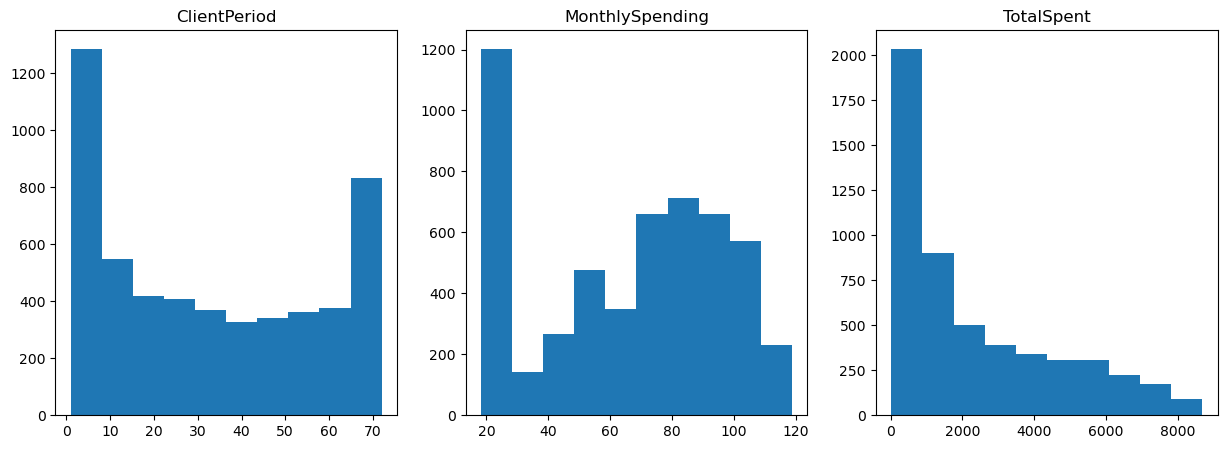

In [125]:
counter = 0
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols =3)
for f in ['ClientPeriod', 'MonthlySpending', 'TotalSpent']:
    N_data_one = N_data[f]
    ax[counter].hist(N_data_one)
    ax[counter].set_title(f)
    counter += 1

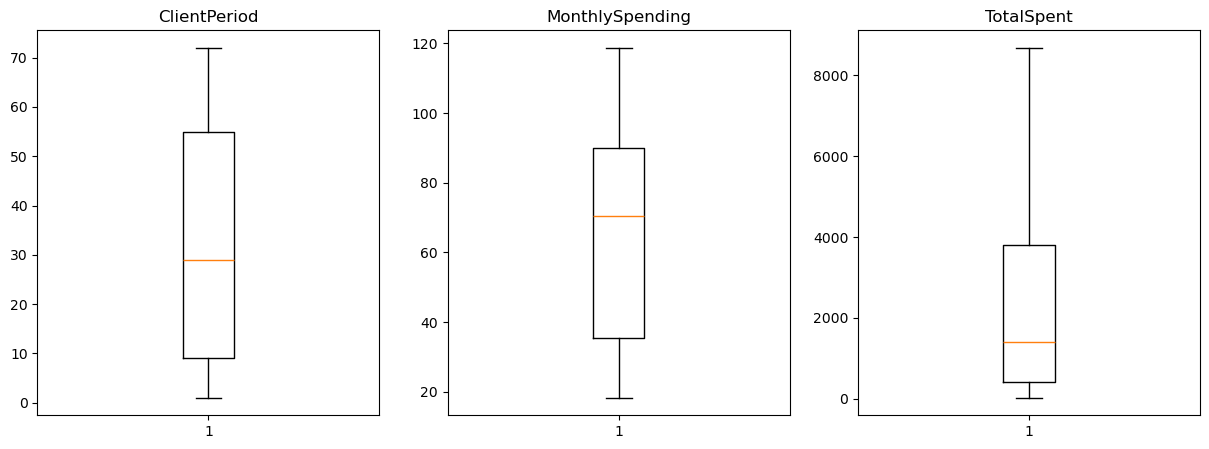

In [126]:
counter = 0
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols =3)
for f in ['ClientPeriod', 'MonthlySpending', 'TotalSpent']:
    N_data_one = N_data[f]
    ax[counter].boxplot(list(N_data_one))
    ax[counter].set_title(f)
    counter += 1

Прежде чем мы начнем с категориальных признаков, я хочу рассмотреть уникальные состояния некоторых из них, которые выглядят как бинарные

In [127]:
cols = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasContractPhone', 'IsBillingPaperless']
for col in cols:
    print(N_data[col].value_counts())

Sex
Male      2651
Female    2622
Name: count, dtype: int64
HasPartner
No     2704
Yes    2569
Name: count, dtype: int64
HasChild
No     3676
Yes    1597
Name: count, dtype: int64
HasPhoneService
Yes    4754
No      519
Name: count, dtype: int64
HasContractPhone
Month-to-month    2920
Two year          1272
One year          1081
Name: count, dtype: int64
IsBillingPaperless
Yes    3145
No     2128
Name: count, dtype: int64


Таким образом признаки 'Sex', 'HasPartner', 'HasChild', 'HasPhoneService' и 'IsBillingPaperless' можно кодировать бинарно, если это потом понадобится

Признак 'IsSeniorCitizen' уже закодирован 0 и 1, поэтому приведем его к виду остальных в yes и no

In [128]:
N_data['IsSeniorCitizen'] = N_data['IsSeniorCitizen'].map({1: 'Yes', 0: 'No'})

/tmp/ipykernel_26273/3975990439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  N_data['IsSeniorCitizen'] = N_data['IsSeniorCitizen'].map({1: 'Yes', 0: 'No'})


Теперь мы можем визуализировать количество уникальных значений категориальных признаков:

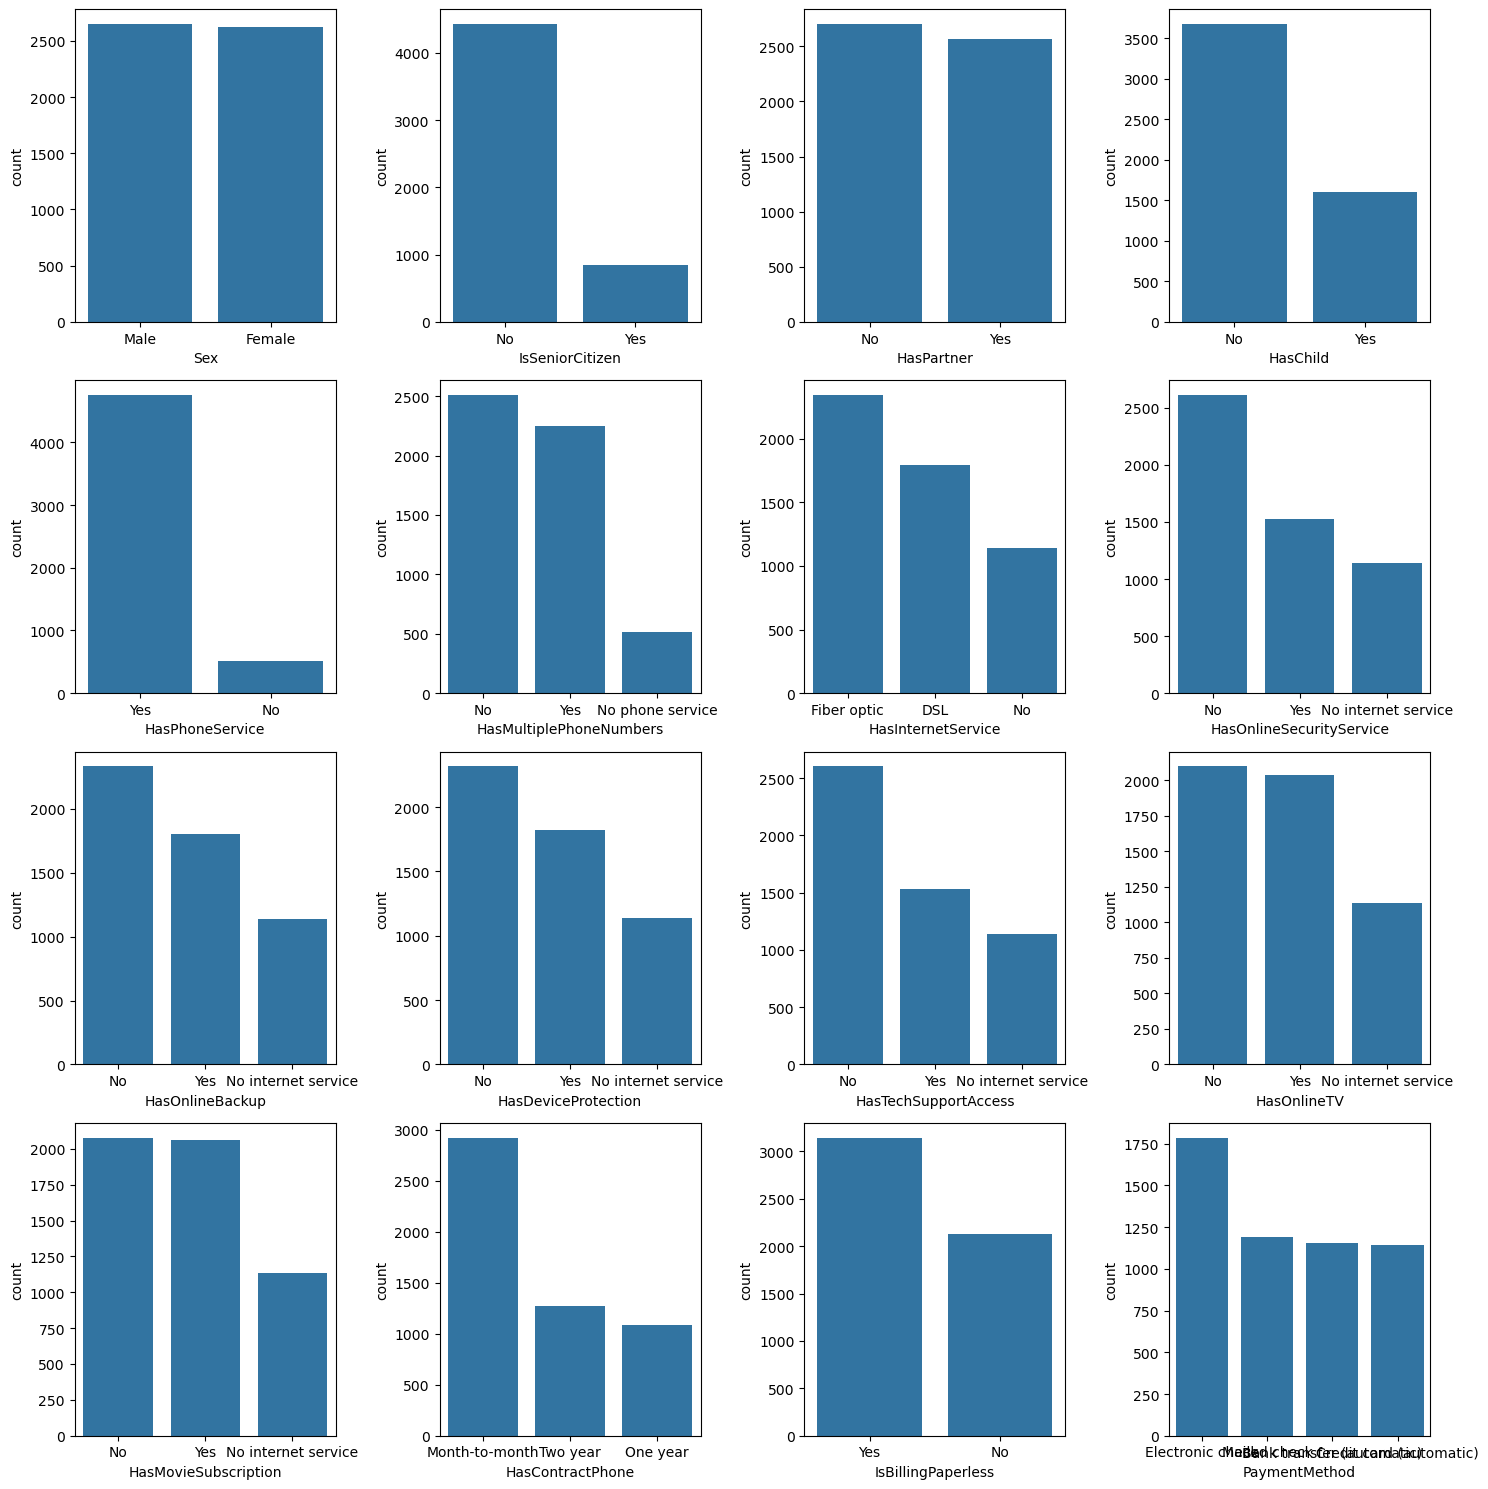

In [129]:
import seaborn as sns
fig, ax = plt.subplots(4, 4, figsize=(15,15))
counter = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=N_data, x=cat_cols[counter], order=N_data[cat_cols[counter]].value_counts().sort_values(ascending=False).index, ax=ax[i,j])
        counter += 1
plt.tight_layout()
plt.show()

Пользовательская функция для отображения чисел вместо процентов

In [130]:
def percent_to_count(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return str('{}% - {}'.format(int(pct), absolute))

Более удобная визуализация категориальных признаков

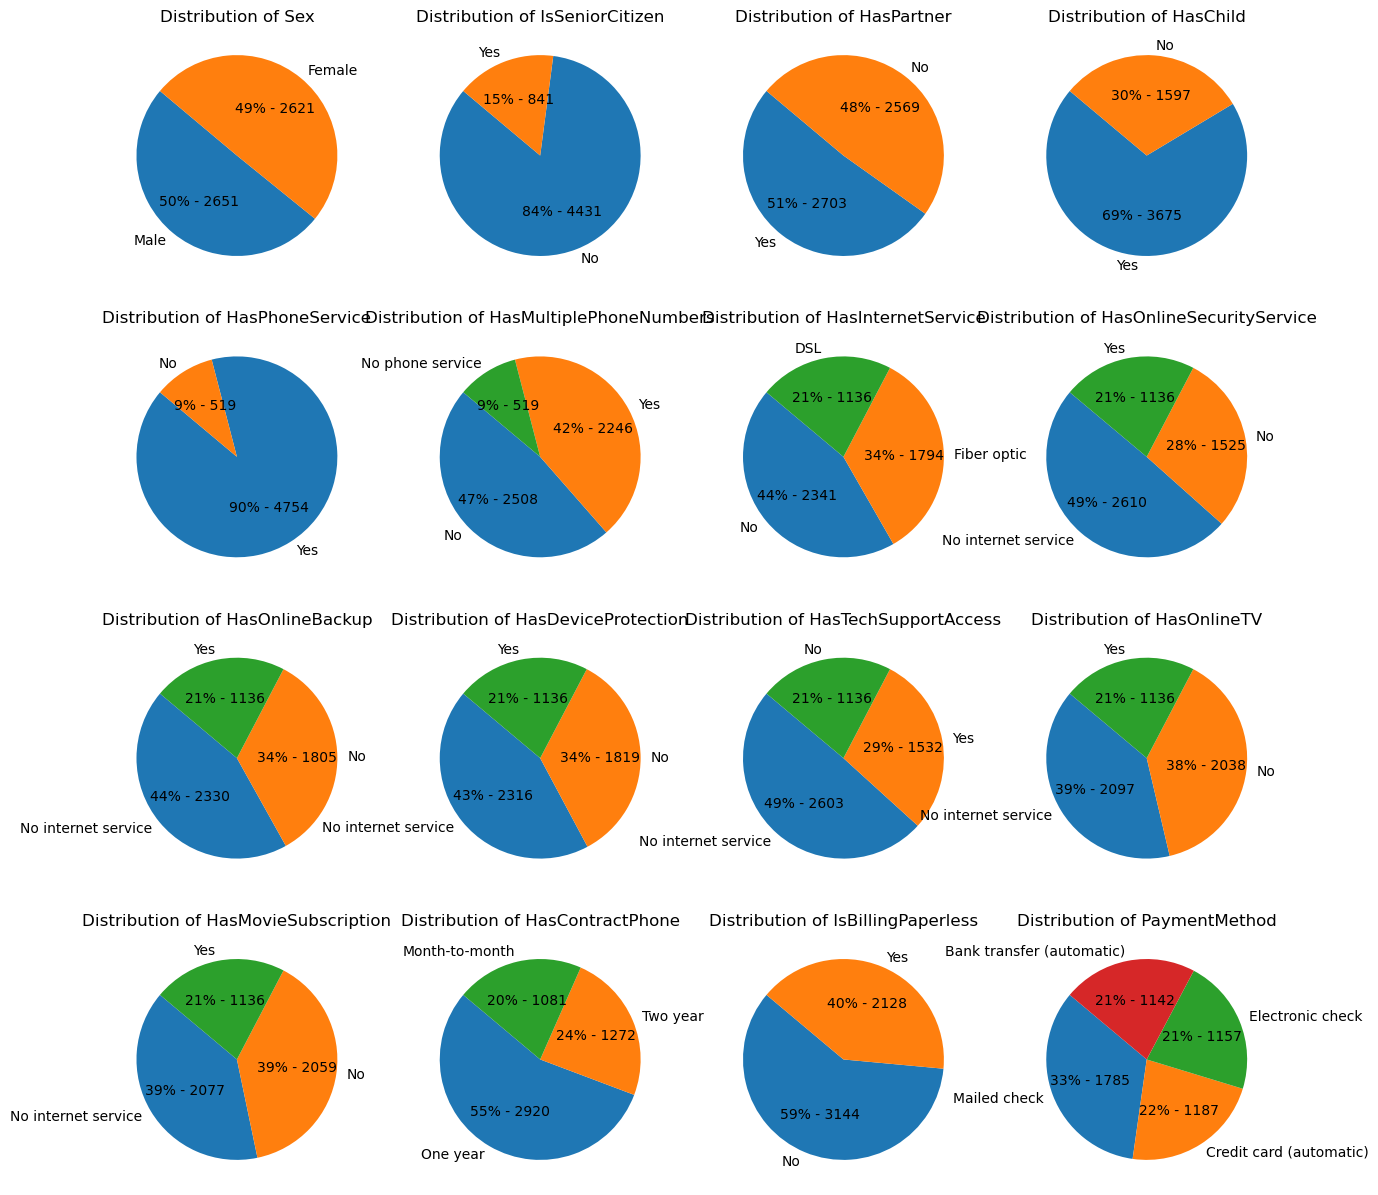

In [131]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
for i, column in enumerate(cat_cols): 
    value_counts = N_data[column].value_counts()
    axs[i//4][i%4].pie(value_counts, labels=list(N_data[column].unique()), autopct=lambda pct: percent_to_count(pct, value_counts), startangle=140)
    axs[i//4][i%4].set_title(f'Distribution of {column}')    
plt.show()

Распределение таргета

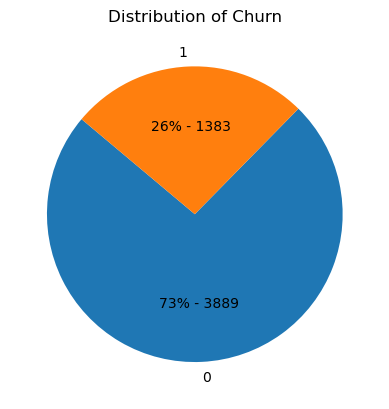

In [132]:
value_counts = N_data[target_col].value_counts()
plt.pie(value_counts, labels=list(N_data[target_col].unique()), autopct=lambda pct: percent_to_count(pct, value_counts), startangle=140)
plt.title(f'Distribution of {target_col}')
plt.show()

Датасет несбалансирован, это мы учтем позже при обучении

Визуализируем зависимость таргета от значений категориальных переменных

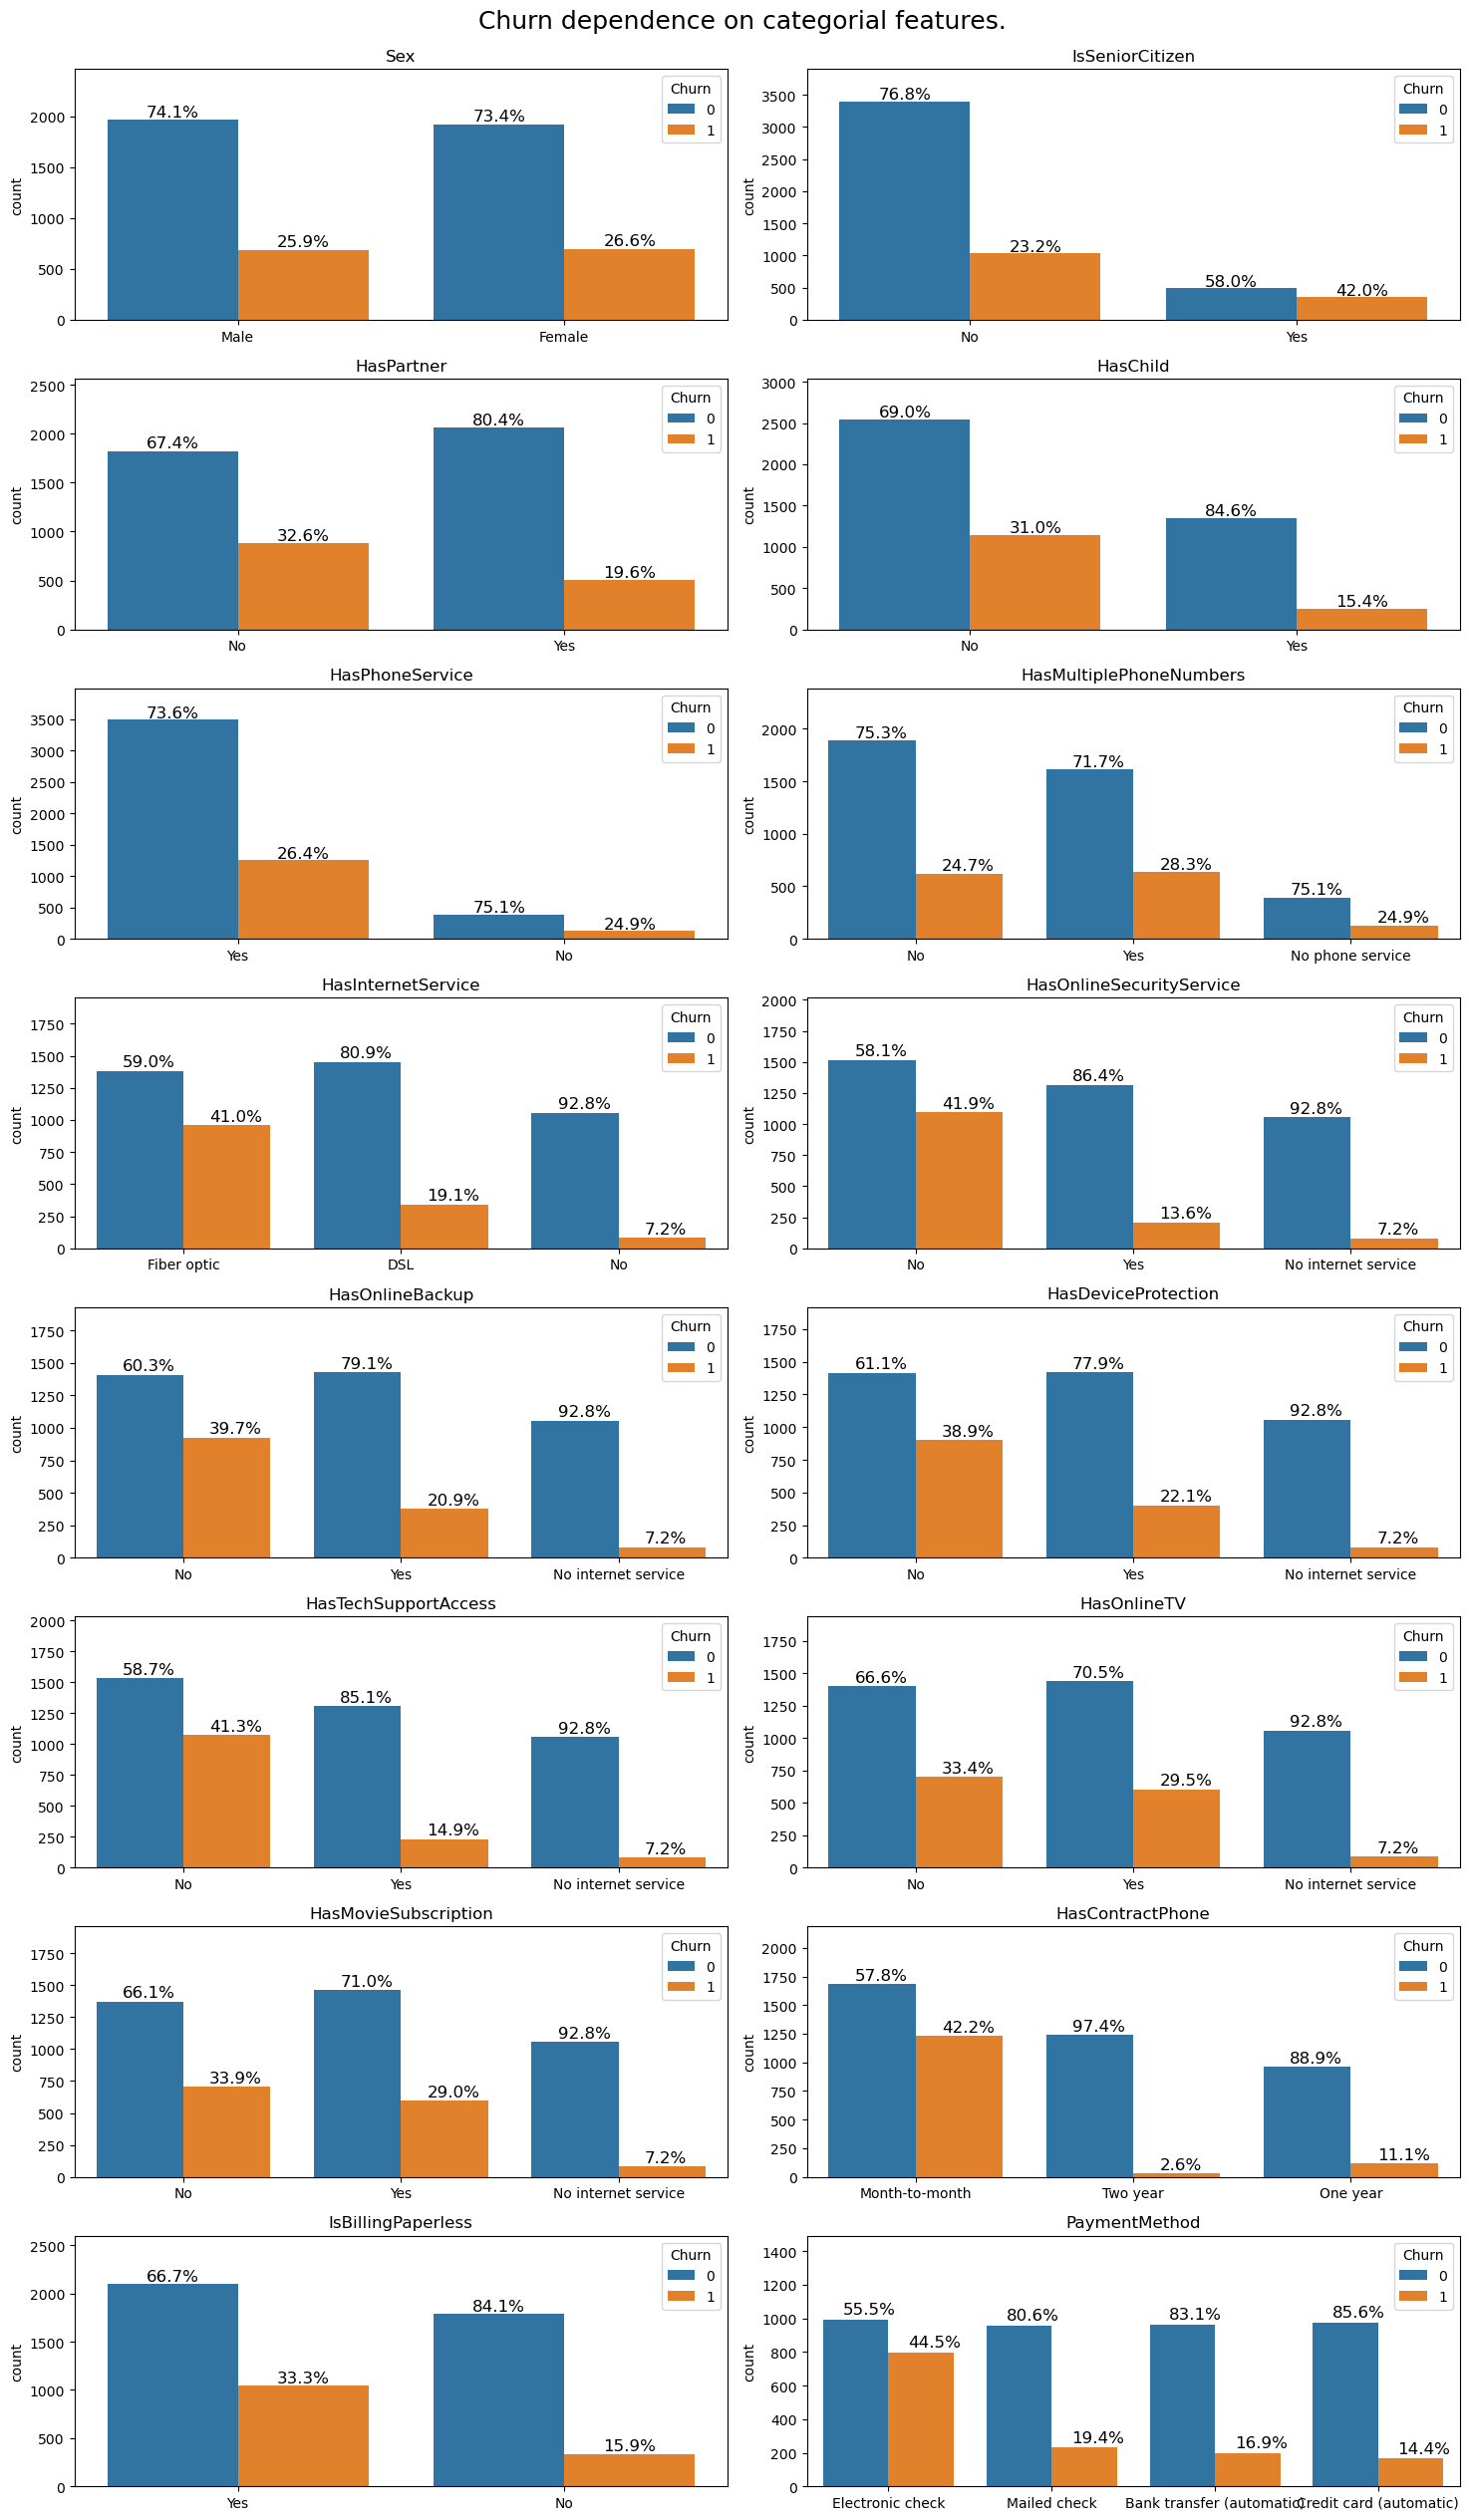

In [133]:
fig, ax = plt.subplots(8, 2, figsize=(15,25))
counter = 0
for i in range(8):
    for j in range(2):
        sns.countplot(data=N_data, x=cat_cols[counter], hue='Churn',
                      order=N_data[cat_cols[counter]].value_counts().sort_values(ascending=False).index,
                      ax=ax[i,j])
        
        heights = [p.get_height() for p in ax[i,j].patches]
        patch = [p for p in ax[i,j].patches]
        num_cat = N_data[cat_cols[counter]].nunique()
        
        for n in range(num_cat):
            total = N_data[cat_cols[counter]].value_counts().values[n]
            for m in range(2):
                percentage = '{:.1f}%'.format(100*heights[(m*num_cat + n)]/total)
                x = patch[(m*num_cat + n)].get_x() + patch[(m*num_cat + n)].get_width() / 2 - 0.08
                y = patch[(m*num_cat + n)].get_y() + patch[(m*num_cat + n)].get_height()+35
                ax[i,j].annotate(percentage, (x,y), size=12)
        
        ax[i,j].set_title(ax[i,j].get_xlabel())
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylim(0,max(heights)+500)
        counter += 1
plt.tight_layout()
plt.suptitle('Churn dependence on categorial features.', y=1.01, fontsize=18)
plt.show()


По графикам выше уже можно сделать некоторые выводы, но из-за несбалансированности датасета это не очень удобно делать. Поэтому только в рамках анализа создадим сбалансированный датасет из имеющегося путем уменьшения выборки (в данном случае дублирование примеров класса-меньшинства влияет на репрезентативность данных)

In [134]:
num_cols_data = N_data[num_cols]
num_cols_data.info

<bound method DataFrame.info of       ClientPeriod  MonthlySpending  TotalSpent
0               55            19.50     1026.35
1               72            25.85     1872.20
2                1            75.90       75.90
3               32            79.30     2570.00
4               60           115.25     6758.45
...            ...              ...         ...
5277             3            30.40       82.15
5278            50            44.45     2188.45
5279             1            55.05       55.05
5280            29            76.00     2215.25
5281            19            75.90     1375.60

[5273 rows x 3 columns]>

In [ ]:
# from sklearn.preprocessing import StandardScaler
# num_cols_data = N_data[num_cols]
# scaler = StandardScaler().fit(num_cols_data.values)
# num_cols_data = scaler.transform(num_cols_data.values)
# N_data[num_cols] = num_cols_data
# N_data[num_cols] 

In [135]:
from imblearn.under_sampling import RandomUnderSampler
New_data = N_data
rus = RandomUnderSampler() # Вы знаете Руса!
y = New_data[target_col]
X = New_data.drop(target_col, axis=1)
X_resampled, y_resampled = rus.fit_resample(X, y)

Rus_data = pd.concat([X_resampled, y_resampled], axis=1)
Rus_data_show_rand = Rus_data.sample(frac=0.03)
Rus_data_show_rand 

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
402,3,75.10,270.70,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
177,39,23.80,903.80,Male,No,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,0
4165,5,28.45,131.05,Female,Yes,No,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,1
3729,68,60.30,4109.00,Female,No,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
2814,60,79.00,4801.10,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Mailed check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,33,79.95,2684.85,Female,No,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),0
1289,7,85.20,602.55,Male,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,1
204,56,99.75,5608.40,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),0
4937,11,19.65,225.75,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


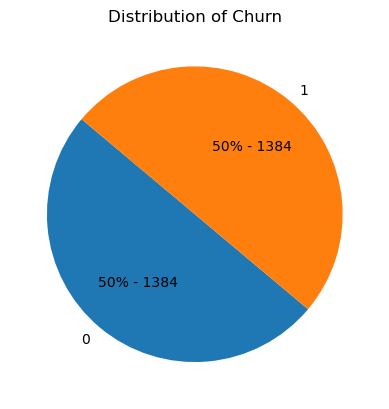

In [136]:
value_counts = Rus_data[target_col].value_counts()
plt.pie(value_counts, labels=list(Rus_data[target_col].unique()), autopct=lambda pct: percent_to_count(pct, value_counts), startangle=140)
plt.title(f'Distribution of {target_col}')
plt.show()

А теперь посмотрим на зависимость таргета от значений категориальных переменных в этом наборе данных

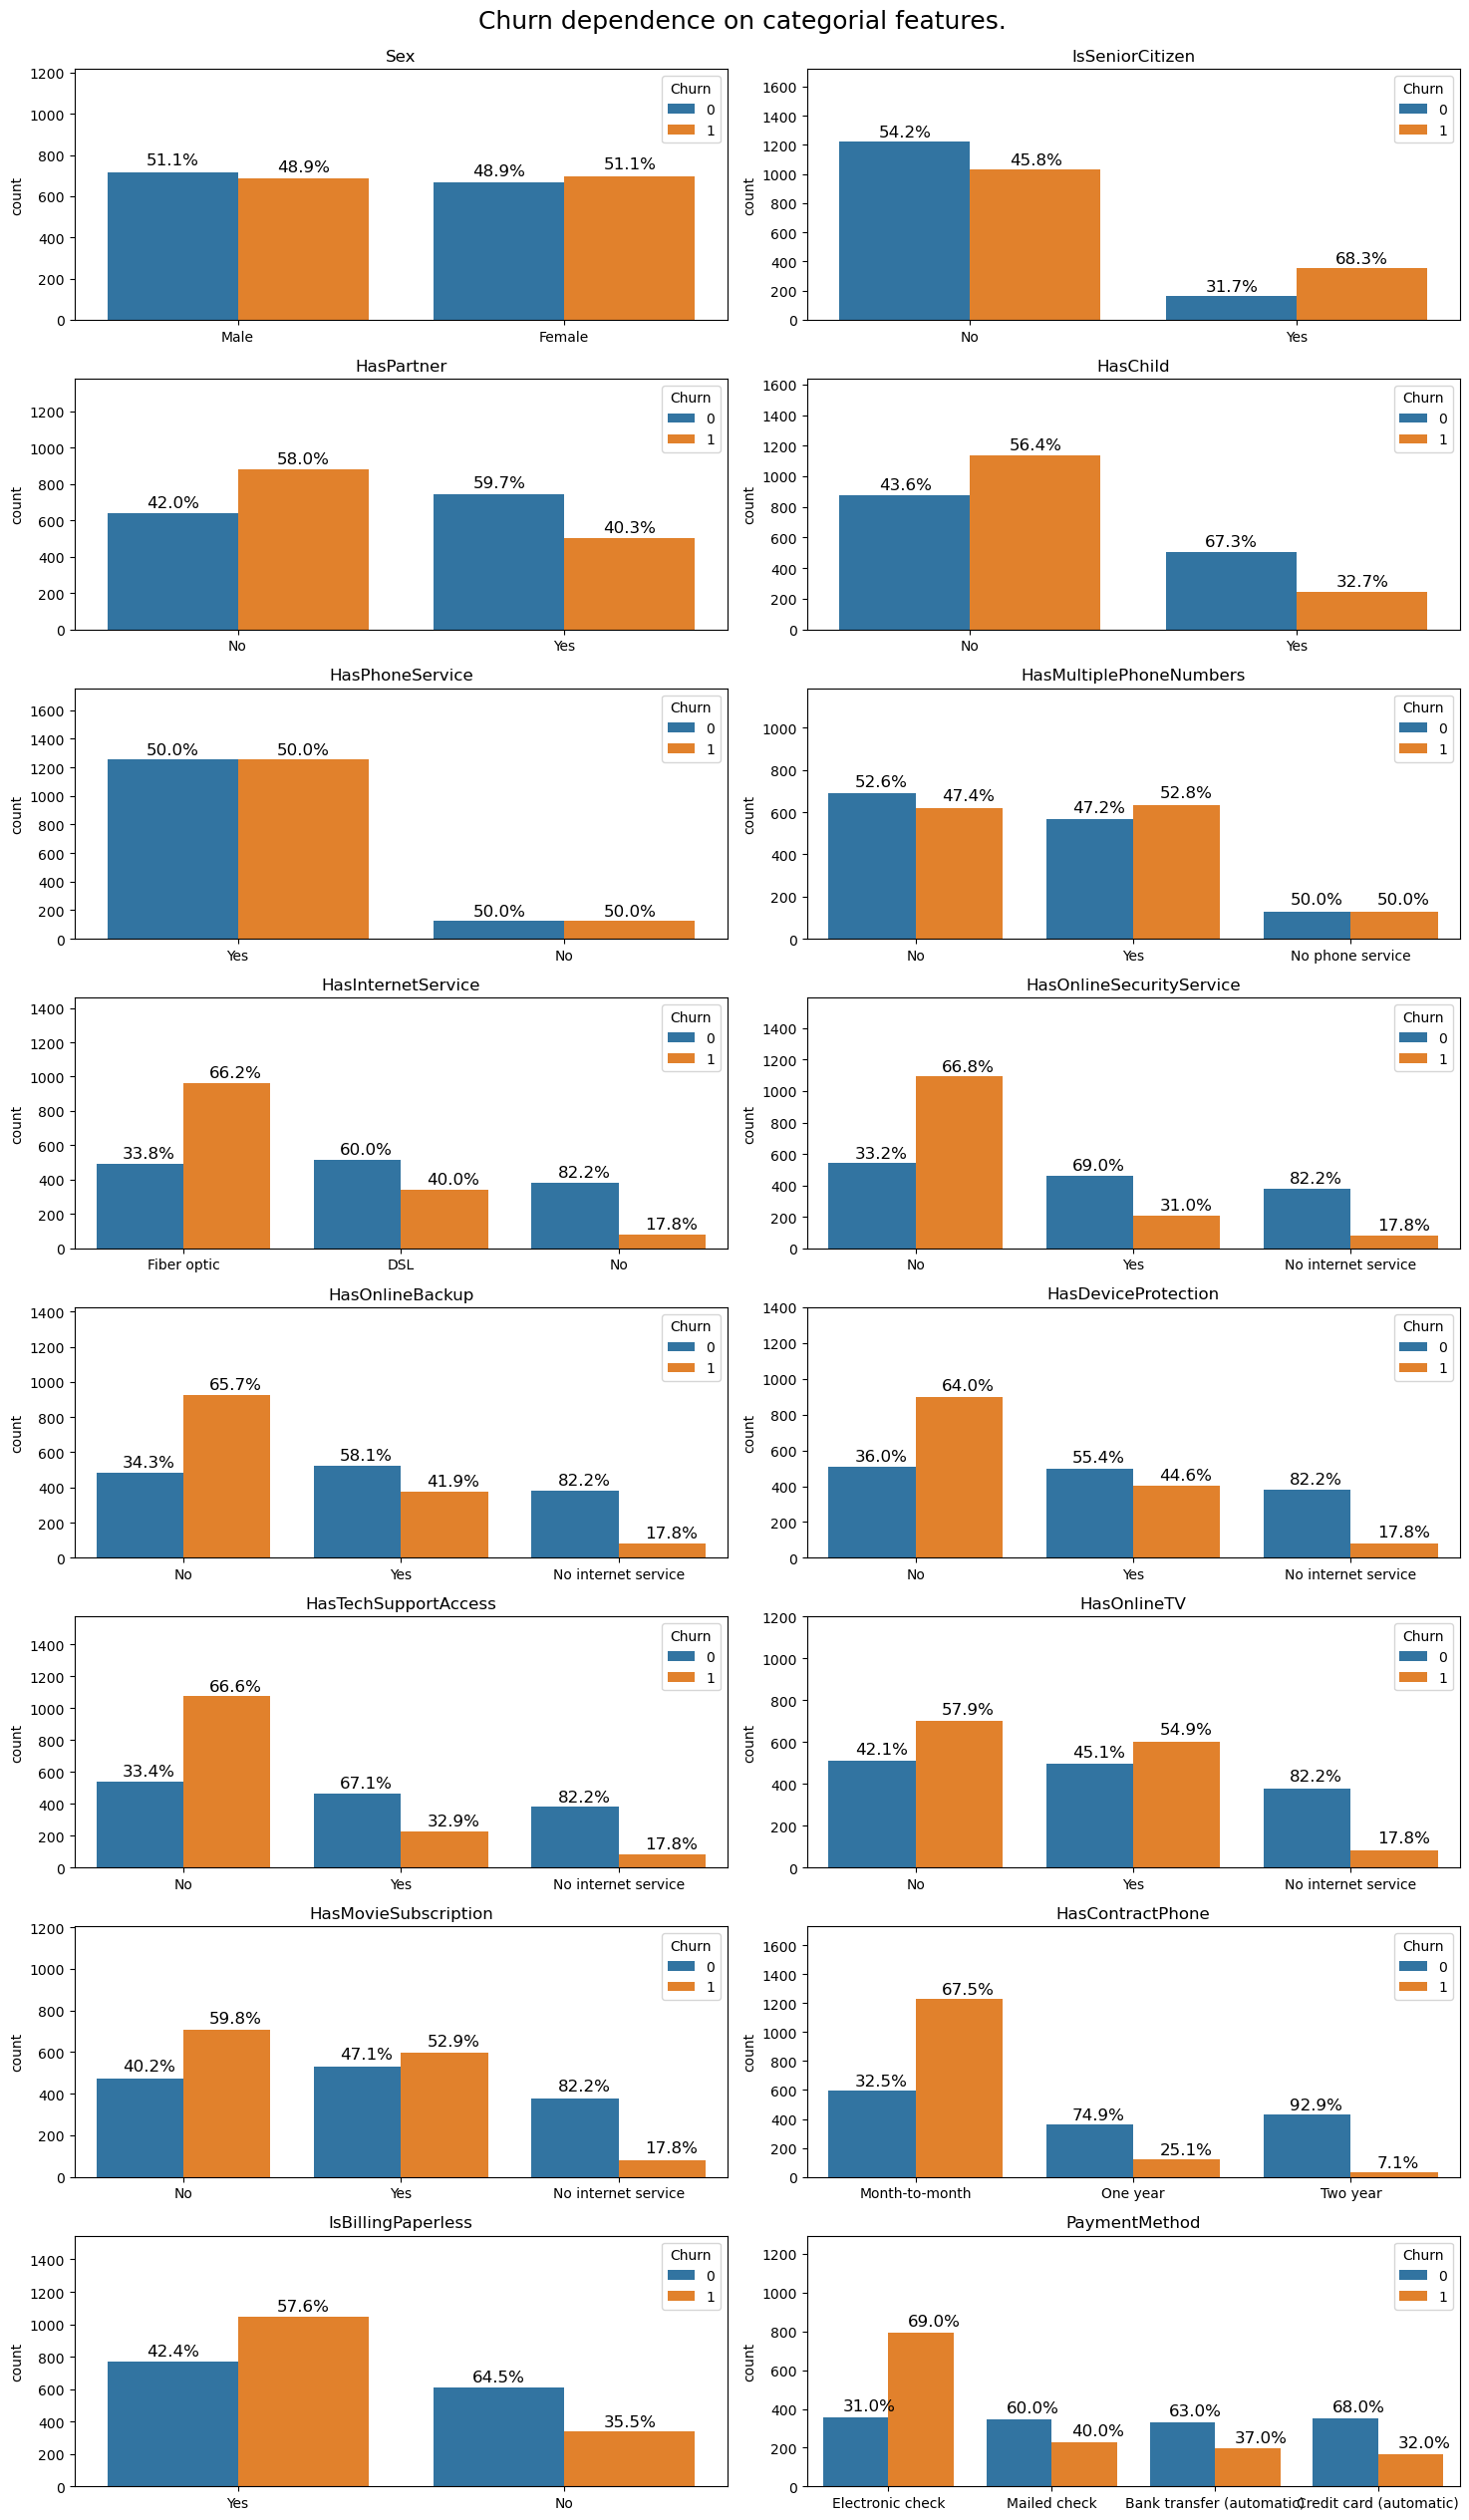

In [137]:
fig, ax = plt.subplots(8, 2, figsize=(15,25))
counter = 0
for i in range(8):
    for j in range(2):
        sns.countplot(data=Rus_data, x=cat_cols[counter], hue='Churn',
                      order=Rus_data[cat_cols[counter]].value_counts().sort_values(ascending=False).index,
                      ax=ax[i,j])
        
        heights = [p.get_height() for p in ax[i,j].patches]
        patch = [p for p in ax[i,j].patches]
        num_cat = Rus_data[cat_cols[counter]].nunique()
        
        for n in range(num_cat):
            total = Rus_data[cat_cols[counter]].value_counts().values[n]
            for m in range(2):
                percentage = '{:.1f}%'.format(100*heights[(m*num_cat + n)]/total)
                x = patch[(m*num_cat + n)].get_x() + patch[(m*num_cat + n)].get_width() / 2 - 0.08
                y = patch[(m*num_cat + n)].get_y() + patch[(m*num_cat + n)].get_height()+35
                ax[i,j].annotate(percentage, (x,y), size=12)
        
        ax[i,j].set_title(ax[i,j].get_xlabel())
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylim(0,max(heights)+500)
        counter += 1
plt.tight_layout()
plt.suptitle('Churn dependence on categorial features.', y=1.01, fontsize=18)
plt.show()

1)
* Пол (sex) никак не влияет на значение таргет (отток клиентов)
* Наличие телефонного сервиса(HasPhoneService), как и Наличие нескольких телефонных линий(HasMultiplePhoneNumbers) не влияют на таргет
2)
* Среди пенсионеров(IsSeniorCitizen) таргет в два раза больше
* C услугой безбумажного продажи (IsBillingPaperless) оттока в два раза больше
* У людей, состоящих в браке(HasPartner) таргет меньше
* У людей с детьми(HasChild) таргет в два раза меньше
3)
* Тип интернета(HasInternetService) сильно влияет: у клиентов на "оптоволокне" процент оттока значительно выше, чем у клиентов с DSL
* Наличие большинства дополнительных сервисов (HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess) значительно уменьшают таргет
* Дополнительные сервисы, стриминговые услуги(HasOnlineTV, HasMovieSubscription) не помогают уменьшить отток клиентов
* Тип контракта(HasContractPhone) оказывает значительное влияние. Отток больше всего у клиентов с month-to-month
* Метод оплаты(PaymentMethod): процент оттока существенно выше среди тех, кто осуществляет оплату электронным чеком

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [143]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

* Несмотря на то, что датасет уже был сбалансирован, ради этого мы пожертвовали данными, что может плохо сказаться на обучении. Поэтому набор данных был перебалансирован заново через RandomOverSampling:
* P.S. Я проверил, плохо сказалось - ROCAUC 0.73 у RUS против 0.76 у ROS 

In [139]:
from imblearn.over_sampling import RandomOverSampler
# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()
y = N_data[target_col]
X = N_data.drop(target_col, axis=1)
# Применение RandomOverSampler к данным
X1_resampled, y1_resampled = ros.fit_resample(X, y)

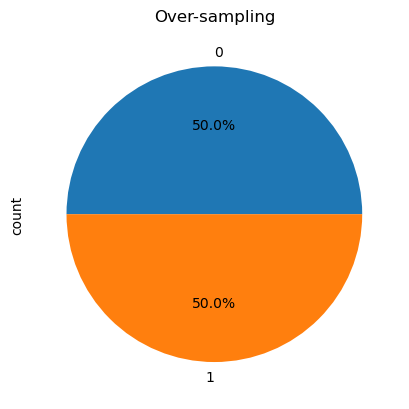

In [140]:
ax = y1_resampled.value_counts().plot.pie(autopct='%1.1f%%')
_ = ax.set_title("Over-sampling")

Проверим комбинации разных обработчиков численных признаков с OneHotEncoder и OrdinalEncoder для категориальных:

In [144]:
from sklearn.compose import ColumnTransformer

# get the categorical and numeric column names
num_cols = X1_resampled.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X1_resampled.select_dtypes(include=['object']).columns.tolist()

# pipelines for numerical columns
num_pipe_1 = make_pipeline(
    StandardScaler()
)
num_pipe_2 = make_pipeline(
    RobustScaler()
)

# pipelines for categorical columns
cat_pipe_1 = make_pipeline(
    OneHotEncoder()
)
cat_pipe_2=make_pipeline(
    OrdinalEncoder()
)

# combine both the pipelines
full_pipe_11 = ColumnTransformer([
    ('num', num_pipe_1, num_cols),
    ('cat', cat_pipe_1, cat_cols)
])
full_pipe_21= ColumnTransformer([
    ('num', num_pipe_2, num_cols),
    ('cat', cat_pipe_1, cat_cols)
])
full_pipe_12 = ColumnTransformer([
    ('num', num_pipe_1, num_cols),
    ('cat', cat_pipe_2, cat_cols)
])

full_pipe_22 = ColumnTransformer([
    ('num', num_pipe_2, num_cols),
    ('cat', cat_pipe_2, cat_cols)
])

# build the models
logreg_11 = make_pipeline(
    full_pipe_11, LogisticRegression())
logreg_21 = make_pipeline(
    full_pipe_21, LogisticRegression())
logreg_12 = make_pipeline(
    full_pipe_12, LogisticRegression())
logreg_22 = make_pipeline(
    full_pipe_22, LogisticRegression())

# splitting data in train and test sets 
X_train, X_val, y_train, y_val = train_test_split(X1_resampled,y1_resampled, 
                                                    test_size=0.3, 
                                                    random_state=101) 

#fitting data into the model 
logreg_11.fit(X_train, y_train) 
logreg_21.fit(X_train, y_train) 
logreg_12.fit(X_train, y_train) 
logreg_22.fit(X_train, y_train)

# predicting values 
y_pred_11 = logreg_11.predict(X_val)
y_pred_21 = logreg_21.predict(X_val) 
y_pred_12 = logreg_12.predict(X_val)
y_pred_22 = logreg_22.predict(X_val)

# calculating accuracy score 
roc_value_11 = roc_auc_score(y_val, y_pred_11)
roc_value_21 = roc_auc_score(y_val, y_pred_21)
roc_value_12 = roc_auc_score(y_val, y_pred_12)
roc_value_22 = roc_auc_score(y_val, y_pred_22)
print('roc auc score for combination Standart_Scaler + OneHotEncoder: ', roc_value_11)
print('roc auc score for combination Robust_Scaler + OneHotEncoder: ', roc_value_21)
print('roc auc score for combination Standart_Scaler + OrdinalEncoder: ', roc_value_12)
print('roc auc score for combination Robust_Scaler + OrdinalEncoder: ', roc_value_22)

roc auc score for combination Standart_Scaler + OneHotEncoder:  0.7558410871622455
roc auc score for combination Robust_Scaler + OneHotEncoder:  0.7566985146739865
roc auc score for combination Standart_Scaler + OrdinalEncoder:  0.7583494483662591
roc auc score for combination Robust_Scaler + OrdinalEncoder:  0.753601636386079


* Теперь проверим комбинации с LabelEncoder:
* LabelEncoder без модификаций и ухищрений не работает внутри пайплайна т.к. принимает меньше аргументов, поэтому отдельно

In [148]:
# Применение LabelEncoder к категориальным признакам
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_resampled[col] = le.fit_transform(X_resampled[col])
    label_encoders[col] = le

X_resampled_RS = X_resampled
X_resampled_SS = X_resampled

# Применение RobustScaler StandardScaler к числовым признакам
scaler_1 = RobustScaler()
scaler_2 = StandardScaler()
X_resampled_RS[num_cols] = scaler_1.fit_transform(X_resampled_RS[num_cols])
X_resampled_SS[num_cols] = scaler_2.fit_transform(X_resampled_SS[num_cols])

# Разделение данных на обучающую и тестовую выборки
X_train_RS, X_val_RS, y_train_RS, y_val_RS = train_test_split(X_resampled_RS, y_resampled,
                                                  test_size=0.3,
                                                  random_state=101)
X_train_SS, X_val_SS, y_train_SS, y_val_SS = train_test_split(X_resampled_SS, y_resampled,
                                                  test_size=0.3,
                                                  random_state=101)

# Создание и обучение модели
logreg_RS = LogisticRegression()
logreg_SS = logreg_RS
logreg_SS.fit(X_train_SS, y_train_SS)
logreg_RS.fit(X_train_RS, y_train_RS)

# predicting values 
y_pred_RS = logreg_RS.predict(X_val_RS)
y_pred_SS = logreg_SS.predict(X_val_SS)

# calculating accuracy score 
roc_value_RS = roc_auc_score(y_val_RS, y_pred_RS)
roc_value_SS = roc_auc_score(y_val_SS, y_pred_SS)
print('roc auc score for combination Standart_Scaler + LabelEncoder: ', roc_value_SS)
print('roc auc score for combination Robust_Scaler + LabelEncoder: ', roc_value_RS)

roc auc score for combination Standart_Scaler + LabelEncoder:  0.7534686774941995
roc auc score for combination Robust_Scaler + LabelEncoder:  0.7534686774941995


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Перебрав различные композиции StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder и OrdinalEncoder результаты показали, что наилучшей комбинацией является OneHotEncoder+StandardScaler с roc auc score :  0.758

Подберем лучшие параметры для этой комбинации:

In [149]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Получим имена категориальных и числовых столбцов
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Пайплайн для числовых столбцов
num_pipe = make_pipeline(StandardScaler())

# Пайплайн для категориальных столбцов
cat_pipe = make_pipeline(OneHotEncoder())

# Объединение обоих пайплайнов
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# Построение модели
logreg = make_pipeline(
    full_pipe, LogisticRegression())

# Настройка GridSearchCV
cv_model = GridSearchCV(
    estimator=logreg,
    param_grid={'logisticregression__C': [1000, 100, 10, 1, 0.1, 0.01, 0.001]},
    cv=5,
    scoring='roc_auc',
    refit=True,
    n_jobs=-1,
    verbose=10
)

# Обучение модели
cv_model.fit(X_train, y_train)

# Получение лучших параметров и результата
params = cv_model.best_params_
score = cv_model.best_score_
print(f'Наилучший результат roc_auc = {score:.3f} достигается при параметре C = {params["logisticregression__C"]}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 4/5; 3/7] START logisticregression__C=10....................................
[CV 1/5; 1/7] START logisticregression__C=1000..................................
[CV 5/5; 1/7] START logisticregression__C=1000..................................
[CV 1/5; 4/7] START logisticregression__C=1.....................................
[CV 1/5; 2/7] START logisticregression__C=100...................................
[CV 2/5; 3/7] START logisticregression__C=10....................................
[CV 2/5; 2/7] START logisticregression__C=100...................................
[CV 5/5; 3/7] START logisticregression__C=10....................................
[CV 2/5; 4/7] START logisticregression__C=1.....................................
[CV 3/5; 1/7] START logisticregression__C=1000..................................
[CV 2/5; 1/7] START logisticregression__C=1000..................................
[CV 3/5; 3/7] START logisticregression__C=10.....

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.


In [154]:
Ros_data = pd.concat([X1_resampled, y1_resampled], axis=1)
Num_Cols_Ros_data = Ros_data[num_cols]
scaler = StandardScaler().fit(Num_Cols_Ros_data.values)
num_cols_data = scaler.transform(Num_Cols_Ros_data.values)
Ros_data[num_cols] = Num_Cols_Ros_data

In [155]:
y = Ros_data[target_col]
X = Ros_data.drop(target_col, axis=1)

In [156]:
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=101, shuffle = True, stratify=y.values) 

In [157]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
3569,63,83.00,5243.05,Female,Yes,No,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic)
1684,41,102.60,4213.35,Male,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4459,37,76.25,2841.55,Female,Yes,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2372,14,80.45,1137.05,Female,No,Yes,Yes,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,3,18.80,56.00,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
7593,39,75.25,3017.65,Male,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check
90,7,45.75,344.20,Male,Yes,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
5977,25,89.10,2368.40,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check


In [159]:
import catboost

boosting_model = catboost.CatBoostClassifier(auto_class_weights='Balanced', verbose=0, cat_features = cat_cols)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_val_predicted = boosting_model.predict_proba(X_val)[:, 1]

In [160]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_val, y_val_predicted)

print('train_auc', train_auc)
print('test_auc', test_auc)

train_auc 0.9276924059058878
test_auc 0.8746347903536925


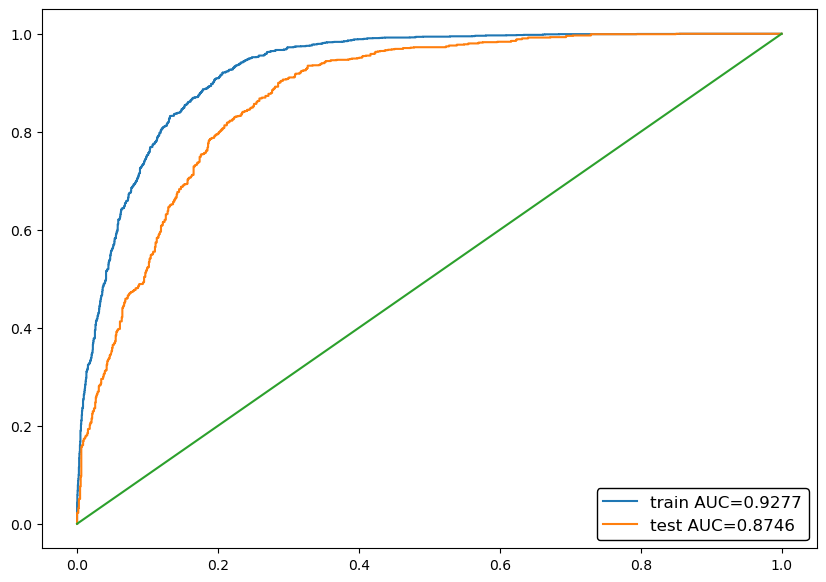

In [161]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Судя по отличию кривых, модель переобучается. Возможно балансировка данных была лишней... НУ ПОПРОБУЕМ

In [179]:
num_cols_data = data[num_cols]
scaler = StandardScaler().fit(num_cols_data.values)
num_cols_data = scaler.transform(num_cols_data.values)
data[num_cols] = num_cols_data
y = data[target_col]
X = data.drop(target_col, axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=101, shuffle = True, stratify=y.values) 

In [180]:
import catboost

boosting_model = catboost.CatBoostClassifier(auto_class_weights='Balanced', verbose=0, cat_features = cat_cols)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_val_predicted = boosting_model.predict_proba(X_val)[:, 1]

In [181]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_val, y_val_predicted)

print('train_auc', train_auc)
print('test_auc', test_auc)

train_auc 0.9009388174161469
test_auc 0.8468726186798476


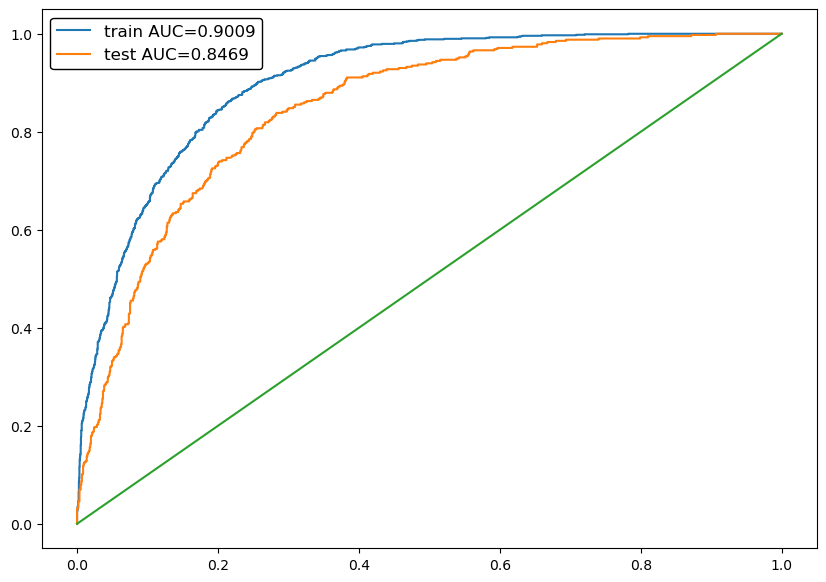

In [182]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

In [183]:
boosting_model = catboost.CatBoostClassifier(auto_class_weights='Balanced', verbose=0,
                                             eval_metric='AUC', cat_features = cat_cols)
param_grid = {
    'l2_leaf_reg': np.linspace(1, 10, 10),
    'n_estimators':  [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [2, 5, 7],
    'min_data_in_leaf':[50, 70, 80, 90]
}

gs_result = boosting_model.grid_search(param_grid,
                           X_train,
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8393924468
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8393924	best: 0.8393924 (0)	total: 308ms	remaining: 5m 32s

bestTest = 0.8434750073
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8434750	best: 0.8434750 (1)	total: 536ms	remaining: 4m 48s

bestTest = 0.8461793485
bestIteration = 80

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8461793	best: 0.8461793 (2)	total: 740ms	remaining: 4m 25s

bestTest = 0.8394492806
bestIteration = 98

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8394493	best: 0.8461793 (2)	total: 926ms	remaining: 4m 8s

best

In [184]:
gs_result['params']

{'min_data_in_leaf': 50,
 'depth': 2,
 'learning_rate': 0.1,
 'l2_leaf_reg': 1,
 'iterations': 200}

In [185]:
best_model =  catboost.CatBoostClassifier(verbose = False, iterations= 200, depth = 2, learning_rate = 0.1, l2_leaf_reg = 2,  min_data_in_leaf = 50,
                                             eval_metric='AUC', cat_features = cat_cols)

best_model.fit(X_train, y_train)

y_train_predicted = best_model.predict_proba(X_train)[:, 1]
y_val_predicted = best_model.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_val, y_val_predicted)

print('train_auc', train_auc)
print('test_auc', test_auc)

train_auc 0.8574578426832996
test_auc 0.8563155184841932


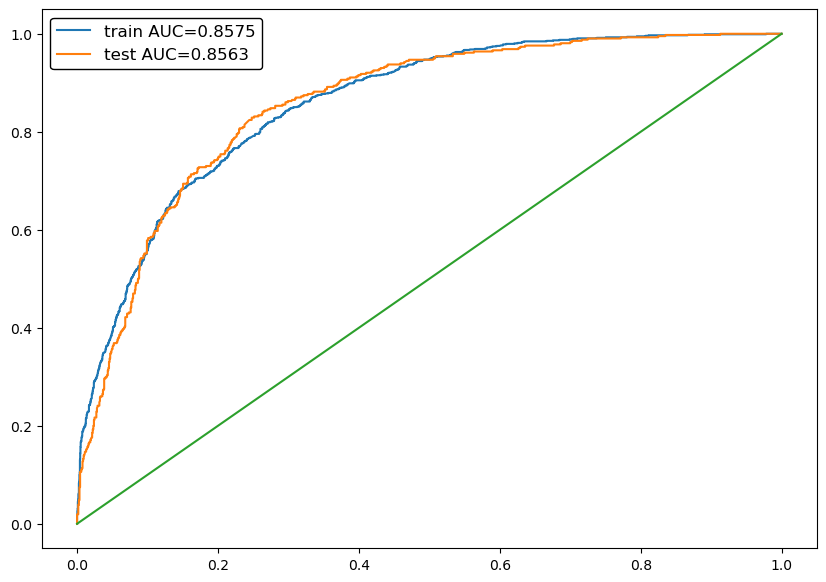

In [186]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Оценим важность признаков для определения значения целевого

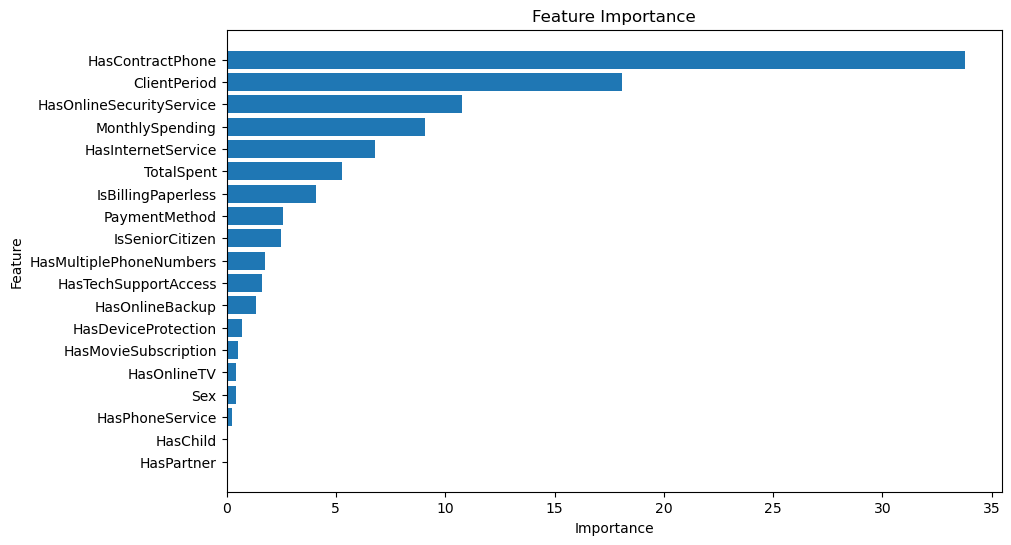

In [187]:
# Получим важность признаков
feature_importance = best_model.get_feature_importance()

# Получим имена признаков
feature_names = X_train.columns

# Создание нового DataFrame для важности признаков
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Отсортируем DataFrame по важности признаков
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Инверсия оси y для удобства
plt.show()

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Наилучшие гиперпараметры: 'min_data_in_leaf': 50, 'depth': 7, 'learning_rate': 0.15, 'l2_leaf_reg': 2, 'iterations': 300

ВАШ ОТВЕТ

# Предсказания

In [188]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Обработаем Test выборку как обработали Train

In [189]:
X_test['IsSeniorCitizen'] = X_test['IsSeniorCitizen'].map({1: 'Yes', 0: 'No'})
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
num_cols_data2 = X_test[num_cols]
scaler = StandardScaler().fit(num_cols_data2.values)
num_cols_data = scaler.transform(num_cols_data2.values)
X_test[num_cols] = num_cols_data
X_test

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,0.394782,-0.274027,0.056553,Male,No,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,-0.133958,1.147644,0.329711,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,-0.947404,0.401602,-0.696591,Male,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,1.411590,0.326160,1.154651,Female,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,1.574279,-1.481107,-0.384735,Female,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,1.574279,1.370619,2.343484,Female,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,-0.784715,-1.455959,-0.879124,Female,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,-1.232110,0.911258,-0.923773,Male,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,-0.540681,0.832463,-0.282428,Female,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [190]:
submission['Churn'] = best_model.predict_proba(X_test)[:,-1:]
submission.to_csv('./my_submission_Best_2.csv', index=False)

In [178]:
submission['Churn'] = boosting_model.predict_proba(X_test)[:,-1:]
submission.to_csv('./my_submission_Cat_boost.csv', index=False)

Лучшее решение отправьте в Stepik.

Лучшим оказалось решение my_submission_Best_2.csv

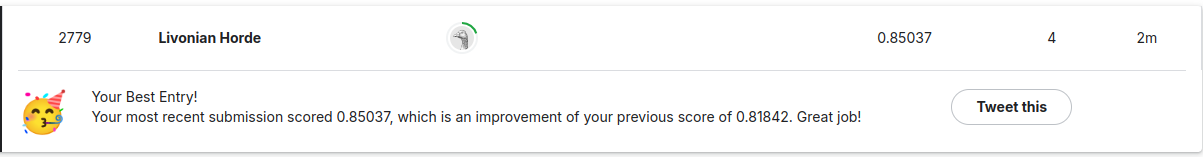